## **Overview**

The objective of this project is to conduct a comprehensive analysis of the user's music preferences and tastes using data from Spotify's API and the user's streaming history. By leveraging Python programming language and various data analysis libraries, the project aims to provide insights into the user's listening habits, preferred artists, tracks, and other relevant metrics. The ultimate goal is to gain a deeper understanding of the user's musical preferences and behavior.

## **Objectives:**

## **Import Package**

In [159]:
# Importing all the required libraries and packages
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
# import plotly.io as pio
import warnings

In [160]:
warnings.filterwarnings("ignore")
# pio.renderers.default = "svg"

In [161]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## **Data Overview**

### **Read Data**

In [162]:
spotify_data = pd.read_csv(r'D:\Project\Repository\spotify-analysis\Data\all_spotify_data.csv', low_memory=False)

In [163]:
spotify_data.head()

,ts,platform,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,track_uri,track_id,track_name,release_date,length,track_popularity,album_id,album_name,artist_name,acousticness,danceability,energy,instrumentalness,liveness,speechiness,loudness,mode,tempo,time_signature
0,2019-02-08T22:51:39Z,Android,31267,NaN,NaN,NaN,"8 - ""Taste"" by Rebecca Woodmass",A Little Poem with Rebecca Woodmass,spotify:episode:0lY0dPwAfZoPgSepp1eCrp,clickrow,endplay,False,NaN,False,1549666235287,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-09T03:50:12Z,Android,5463,NaN,NaN,NaN,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,clickrow,unexpected-exit-while-paused,False,NaN,False,1549666299325,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-02-09T03:50:33Z,Android,5463,NaN,NaN,NaN,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,clickrow,unexpected-exit-while-paused,False,NaN,False,1549666299325,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-02-09T03:50:51Z,Android,5463,NaN,NaN,NaN,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,clickrow,unexpected-exit-while-paused,False,NaN,False,1549666299325,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-02-09T11:05:55Z,Android,77742,NaN,NaN,NaN,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,appload,logout,False,NaN,False,1549710054124,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Detailed Data Information**

In [164]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129291 entries, 0 to 129290
Data columns (total 35 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ts                                 129291 non-null  object 
 1   platform                           129291 non-null  object 
 2   ms_played                          129291 non-null  int64  
 3   master_metadata_track_name         126946 non-null  object 
 4   master_metadata_album_artist_name  126946 non-null  object 
 5   master_metadata_album_album_name   126946 non-null  object 
 6   episode_name                       2268 non-null    object 
 7   episode_show_name                  2265 non-null    object 
 8   spotify_episode_uri                2268 non-null    object 
 9   reason_start                       129291 non-null  object 
 10  reason_end                         129291 non-null  object 
 11  shuffle                            1292

In [165]:
spotify_data.describe()

,ms_played,offline_timestamp,length,track_popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,loudness,mode,tempo,time_signature
count,1.292910e+05,1.292910e+05,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000
mean,1.706095e+05,6.602668e+11,225346.360055,67.454704,0.493939,0.546504,0.488246,0.069886,0.157588,0.050309,-8.672958,0.865396,118.507806,3.916290
std,1.345194e+05,7.959263e+11,54444.477531,15.252182,0.343756,0.137735,0.220862,0.221245,0.106004,0.046766,4.025461,0.341308,29.829805,0.328999
min,0.000000e+00,0.000000e+00,48000.000000,2.000000,0.000026,0.079300,0.002440,0.000000,0.033400,0.023200,-44.677000,0.000000,52.463000,1.000000
25%,1.103370e+05,1.672713e+09,194469.000000,60.000000,0.130000,0.447000,0.319000,0.000000,0.097400,0.030700,-10.917000,1.000000,95.985000,4.000000
50%,1.857730e+05,1.701224e+09,218735.000000,70.000000,0.513000,0.559000,0.463000,0.000011,0.113000,0.036300,-7.680000,1.000000,114.924000,4.000000
75%,2.245420e+05,1.616122e+12,252266.000000,77.000000,0.831000,0.643000,0.661000,0.001010,0.170000,0.051900,-5.927000,1.000000,139.916000,4.000000
max,7.575928e+06,1.665470e+12,493400.000000,96.000000,0.996000,0.925000,0.988000,0.982000,0.626000,0.463000,-1.329000,1.000000,199.811000,5.000000


In [166]:
spotify_data.describe(include='object')

,ts,platform,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,skipped,track_uri,track_id,track_name,release_date,album_id,album_name,artist_name
count,129291,129291,126946,126946,126946,2268,2265,2268,129291,129291,71953,126946,19472,19472,19472,19472,19472,19472
unique,103535,2,13737,6102,10997,1396,296,1397,9,10,4,16706,564,529,348,407,402,117
top,2022-01-01T11:42:30Z,Windows,Location,LANY,gg bb xx,YOASOBI THE BOOK 2 Spotify Edition,Mishary Rashid Alafasy,spotify:episode:0sPNGPetAt5PP9IXKD6Bko,trackdone,trackdone,False,152lZdxL1OR0ZMW6KquMif,1bD4DokWm69ZwGBQ75jAga,You Can Cry,2019-11-29,1DAuVHMlBvIjzWZALSUXbn,Menari Dengan Bayangan,LANY
freq,331,115003,760,4546,1084,86,343,86,90065,89606,35601,757,254,254,607,607,607,986


## **Data Preprocessing**

### **Data Type**

#### **Checking Data Type**

In [167]:
spotify_data.dtypes

ts                                    object
platform                              object
ms_played                              int64
master_metadata_track_name            object
master_metadata_album_artist_name     object
master_metadata_album_album_name      object
episode_name                          object
episode_show_name                     object
spotify_episode_uri                   object
reason_start                          object
reason_end                            object
shuffle                                 bool
skipped                               object
offline                                 bool
offline_timestamp                      int64
incognito_mode                          bool
track_uri                             object
track_id                              object
track_name                            object
release_date                          object
length                               float64
track_popularity                     float64
album_id  

#### **Fixing Data Type**

In [168]:
# Convert 'ts' column to datetime format
spotify_data['ts'] = pd.to_datetime(spotify_data['ts'])

In [169]:
spotify_data['ts'].dtypes

datetime64[ns, UTC]

### **Data Duplicates**

#### **Identifying Data Duplicates**

In [170]:
spotify_data.duplicated().value_counts()

False    112881
True      16410
Name: count, dtype: int64

In [171]:
duplicate_rows = spotify_data[spotify_data.duplicated()]
duplicate_rows.head()

,ts,platform,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,track_uri,track_id,track_name,release_date,length,track_popularity,album_id,album_name,artist_name,acousticness,danceability,energy,instrumentalness,liveness,speechiness,loudness,mode,tempo,time_signature
1456,2019-06-24 03:29:12+00:00,Android,25909,Complicated,Olivia O'Brien,Complicated,NaN,NaN,NaN,trackdone,fwdbtn,True,NaN,False,1561346869704,False,0jllH0usRFD4LJkJnGK9Lf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3418,2019-10-21 09:28:58+00:00,Android,247108,Something Just Like This,The Chainsmokers,Memories...Do Not Open,NaN,NaN,NaN,trackdone,trackdone,False,NaN,False,1571649886882,False,6RUKPb4LETWmmr3iAEQktW,6RUKPb4LETWmmr3iAEQktW,Something Just Like This,2017-04-07,247160.0,87.0,4JPguzRps3kuWDD5GS6oXr,Memories...Do Not Open,The Chainsmokers,0.0498,0.617,0.635,0.000014,0.164,0.0317,-6.769,0.0,103.019,4.0
4549,2019-11-23 10:44:28+00:00,Android,4007,Something Just Like This,The Chainsmokers,Memories...Do Not Open,NaN,NaN,NaN,clickrow,endplay,False,NaN,False,1574505856912,False,6RUKPb4LETWmmr3iAEQktW,6RUKPb4LETWmmr3iAEQktW,Something Just Like This,2017-04-07,247160.0,87.0,4JPguzRps3kuWDD5GS6oXr,Memories...Do Not Open,The Chainsmokers,0.0498,0.617,0.635,0.000014,0.164,0.0317,-6.769,0.0,103.019,4.0
4832,2019-11-30 11:14:35+00:00,Android,247108,Something Just Like This,The Chainsmokers,Memories...Do Not Open,NaN,NaN,NaN,trackdone,trackdone,True,NaN,False,1575112217758,False,6RUKPb4LETWmmr3iAEQktW,6RUKPb4LETWmmr3iAEQktW,Something Just Like This,2017-04-07,247160.0,87.0,4JPguzRps3kuWDD5GS6oXr,Memories...Do Not Open,The Chainsmokers,0.0498,0.617,0.635,0.000014,0.164,0.0317,-6.769,0.0,103.019,4.0
5137,2019-12-08 04:23:33+00:00,Android,247108,Something Just Like This,The Chainsmokers,Memories...Do Not Open,NaN,NaN,NaN,trackdone,trackdone,True,NaN,False,1575778749965,False,6RUKPb4LETWmmr3iAEQktW,6RUKPb4LETWmmr3iAEQktW,Something Just Like This,2017-04-07,247160.0,87.0,4JPguzRps3kuWDD5GS6oXr,Memories...Do Not Open,The Chainsmokers,0.0498,0.617,0.635,0.000014,0.164,0.0317,-6.769,0.0,103.019,4.0


In [172]:
duplicate_rows = spotify_data[spotify_data.duplicated(keep=False)]
duplicate_rows.head()

,ts,platform,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,track_uri,track_id,track_name,release_date,length,track_popularity,album_id,album_name,artist_name,acousticness,danceability,energy,instrumentalness,liveness,speechiness,loudness,mode,tempo,time_signature
1455,2019-06-24 03:29:12+00:00,Android,25909,Complicated,Olivia O'Brien,Complicated,NaN,NaN,NaN,trackdone,fwdbtn,True,NaN,False,1561346869704,False,0jllH0usRFD4LJkJnGK9Lf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,2019-06-24 03:29:12+00:00,Android,25909,Complicated,Olivia O'Brien,Complicated,NaN,NaN,NaN,trackdone,fwdbtn,True,NaN,False,1561346869704,False,0jllH0usRFD4LJkJnGK9Lf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3417,2019-10-21 09:28:58+00:00,Android,247108,Something Just Like This,The Chainsmokers,Memories...Do Not Open,NaN,NaN,NaN,trackdone,trackdone,False,NaN,False,1571649886882,False,6RUKPb4LETWmmr3iAEQktW,6RUKPb4LETWmmr3iAEQktW,Something Just Like This,2017-04-07,247160.0,87.0,4JPguzRps3kuWDD5GS6oXr,Memories...Do Not Open,The Chainsmokers,0.0498,0.617,0.635,0.000014,0.164,0.0317,-6.769,0.0,103.019,4.0
3418,2019-10-21 09:28:58+00:00,Android,247108,Something Just Like This,The Chainsmokers,Memories...Do Not Open,NaN,NaN,NaN,trackdone,trackdone,False,NaN,False,1571649886882,False,6RUKPb4LETWmmr3iAEQktW,6RUKPb4LETWmmr3iAEQktW,Something Just Like This,2017-04-07,247160.0,87.0,4JPguzRps3kuWDD5GS6oXr,Memories...Do Not Open,The Chainsmokers,0.0498,0.617,0.635,0.000014,0.164,0.0317,-6.769,0.0,103.019,4.0
4548,2019-11-23 10:44:28+00:00,Android,4007,Something Just Like This,The Chainsmokers,Memories...Do Not Open,NaN,NaN,NaN,clickrow,endplay,False,NaN,False,1574505856912,False,6RUKPb4LETWmmr3iAEQktW,6RUKPb4LETWmmr3iAEQktW,Something Just Like This,2017-04-07,247160.0,87.0,4JPguzRps3kuWDD5GS6oXr,Memories...Do Not Open,The Chainsmokers,0.0498,0.617,0.635,0.000014,0.164,0.0317,-6.769,0.0,103.019,4.0


### **Missing Values**

#### **Identifying Missing Values**

In [173]:
# Function to calculate missing values by column 
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [174]:
missing_values = missing_values_table(spotify_data)
missing_values

Your selected dataframe has 35 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
episode_show_name,127026,98.2
episode_name,127023,98.2
spotify_episode_uri,127023,98.2
album_id,109819,84.9
artist_name,109819,84.9
tempo,109819,84.9
mode,109819,84.9
loudness,109819,84.9
speechiness,109819,84.9
liveness,109819,84.9


We see that `episode_show_name`,`episode_name`, and `spotify_episode_uri` have the highest null/missing values because only 1.8% of the entire dataset belongs to podcasts, and those three columns are specifically related to podcasts. 

Additionally, several columns have null percentages exceeding 80% due to most of them containing information derived from the Spotify API dataset (before merging), which only consists of 1000 rows. Consequently, upon merging with the streaming history dataset, numerous values became null. 

For this reason, I haven't performed any missing value handling yet.

### **Features List**

In [175]:
# List numerical features in streaming history music dataframe
numerical_features = list(spotify_data.select_dtypes(include=['int64','float64']).columns)
print('List of numerical featues {}'.format(numerical_features))

List of numerical featues ['ms_played', 'offline_timestamp', 'length', 'track_popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'loudness', 'mode', 'tempo', 'time_signature']


In [176]:
# List categorical features
categorical_features = list(spotify_data.select_dtypes(include=['object']).columns)
print('List of categorical featues {}'.format(categorical_features))

List of categorical featues ['platform', 'master_metadata_track_name', 'master_metadata_album_artist_name', 'master_metadata_album_album_name', 'episode_name', 'episode_show_name', 'spotify_episode_uri', 'reason_start', 'reason_end', 'skipped', 'track_uri', 'track_id', 'track_name', 'release_date', 'album_id', 'album_name', 'artist_name']


### **Separate Music and Podcast from Streaming History**

#### **Music Streaming History**

In [177]:
# Make sure the data only includes music history
indices_to_drop = spotify_data[spotify_data['episode_name'].notnull() & spotify_data['episode_show_name'].notnull() & spotify_data['spotify_episode_uri'].notnull()].index
spotify_music = spotify_data.drop(indices_to_drop)

In [178]:
# Remove columns related to podcast
spotify_music = spotify_music.drop(columns=['episode_name', 'episode_show_name', 'spotify_episode_uri'])

In [179]:
spotify_music.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127026 entries, 5 to 129290
Data columns (total 32 columns):
 #   Column                             Non-Null Count   Dtype              
---  ------                             --------------   -----              
 0   ts                                 127026 non-null  datetime64[ns, UTC]
 1   platform                           127026 non-null  object             
 2   ms_played                          127026 non-null  int64              
 3   master_metadata_track_name         126946 non-null  object             
 4   master_metadata_album_artist_name  126946 non-null  object             
 5   master_metadata_album_album_name   126946 non-null  object             
 6   reason_start                       127026 non-null  object             
 7   reason_end                         127026 non-null  object             
 8   shuffle                            127026 non-null  bool               
 9   skipped                            70840 n

In [180]:
spotify_music.head()

,ts,platform,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,track_uri,track_id,track_name,release_date,length,track_popularity,album_id,album_name,artist_name,acousticness,danceability,energy,instrumentalness,liveness,speechiness,loudness,mode,tempo,time_signature
5,2019-02-09 14:54:58+00:00,Android,47292,A Sky Full of Stars - Live at the Royal Albert...,Coldplay,Ghost Stories Live 2014,appload,endplay,True,NaN,False,1549724033458,False,2WXTF0qgKbczC2O8VymeLO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-02-09 14:55:31+00:00,Android,30126,Noi siamo infinito,Alessio Bernabei,Noi siamo infinito,clickrow,endplay,True,NaN,False,1549724096707,False,3mBROtKxM1QTRv98X1dArZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-02-09 14:56:14+00:00,Android,40875,Sediakala,Dialog Dini Hari,Sediakala,appload,endplay,True,NaN,False,1549724131761,False,7rXlplJTbAB1gqGZtlWvR5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-02-09 14:56:58+00:00,Android,42898,Garis Terdepan,Fiersa Besari,Konspirasi Alam Semesta,clickrow,endplay,True,NaN,False,1549724173484,False,5LjtZJr2XsaeEdieJ5rrcS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-02-09 14:57:36+00:00,Android,34332,Kata Hilang Makna,Yura Yunita,Merakit,appload,endplay,True,NaN,False,1549724219564,False,1jAF90jCmaSnAkcWHTHP0t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Music Streaming History with Audio Features Detail**

In [181]:
# Make sure the data only includes music history
spotify_music_audiofeatures = spotify_music.loc[spotify_music['track_id'].notnull()]

In [182]:
spotify_music_audiofeatures.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19472 entries, 10 to 129254
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   ts                                 19472 non-null  datetime64[ns, UTC]
 1   platform                           19472 non-null  object             
 2   ms_played                          19472 non-null  int64              
 3   master_metadata_track_name         19472 non-null  object             
 4   master_metadata_album_artist_name  19472 non-null  object             
 5   master_metadata_album_album_name   19472 non-null  object             
 6   reason_start                       19472 non-null  object             
 7   reason_end                         19472 non-null  object             
 8   shuffle                            19472 non-null  bool               
 9   skipped                            10992 non-null  ob

In [183]:
spotify_music_audiofeatures.head()

,ts,platform,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,track_uri,track_id,track_name,release_date,length,track_popularity,album_id,album_name,artist_name,acousticness,danceability,energy,instrumentalness,liveness,speechiness,loudness,mode,tempo,time_signature
10,2019-02-09 14:57:59+00:00,Android,21886,Untuk Perempuan Yang Sedang Di Pelukan,Payung Teduh,Dunia Batas,clickrow,fwdbtn,True,NaN,False,1549724255489,False,0urpBLpcm6DOGzs86rcKd8,0urpBLpcm6DOGzs86rcKd8,Untuk Perempuan Yang Sedang Di Pelukan,2014-11-04,342000.0,72.0,26FxxaKDiIGxEm549dRtaZ,Dunia Batas,Payung Teduh,0.55200,0.477,0.493,0.003450,0.1020,0.0291,-7.346,1.0,148.984,4.0
11,2019-02-09 14:58:09+00:00,Android,1638,"Yang Patah Tumbuh, Yang Hilang Berganti",Banda Neira,"Yang Patah Tumbuh, Yang Hilang Berganti",fwdbtn,fwdbtn,True,NaN,False,1549724278451,False,6Rd4ep779v8CjlFVhaHrNX,6Rd4ep779v8CjlFVhaHrNX,"Yang Patah Tumbuh, Yang Hilang Berganti",2016-01-29,393072.0,63.0,1e1NmOduCFHp1z29cSzyMa,"Yang Patah Tumbuh, Yang Hilang Berganti",Banda Neira,0.93800,0.353,0.354,0.004070,0.1220,0.0268,-10.850,1.0,96.887,4.0
19,2019-02-10 00:46:51+00:00,Android,3856,"Zona Nyaman (From ""Filosofi Kopi 2: Ben & Jody"")",Fourtwnty,Ego & Fungsi Otak,clickrow,endplay,False,NaN,False,1549759605916,False,4lfAvFv8roumWVKXhHF8uN,4lfAvFv8roumWVKXhHF8uN,"Zona Nyaman (From ""Filosofi Kopi 2: Ben & Jody"")",2018-04-20,243413.0,67.0,01PCAiyhBHXTj9KfSigcQz,Ego & Fungsi Otak,Fourtwnty,0.35500,0.515,0.649,0.001550,0.1750,0.0338,-6.278,1.0,120.003,4.0
20,2019-02-10 00:46:56+00:00,Android,4545,Monokrom,Tulus,Monokrom,clickrow,endplay,False,NaN,False,1549759610209,False,4GfK1qOF3uBWidbPlTCQRL,4GfK1qOF3uBWidbPlTCQRL,Monokrom,2016-08-03,214567.0,76.0,4szhn3xPmOJklFAcqNvTnQ,Monokrom,Tulus,0.57300,0.534,0.462,0.000006,0.0974,0.0326,-9.383,1.0,88.046,4.0
26,2019-02-10 00:55:25+00:00,Android,34663,Yellow,Coldplay,Parachutes,clickrow,endplay,False,NaN,False,1549760089412,False,3AJwUDP919kvQ9QcozQPxg,3AJwUDP919kvQ9QcozQPxg,Yellow,2000-07-10,266773.0,89.0,6ZG5lRT77aJ3btmArcykra,Parachutes,Coldplay,0.00239,0.429,0.661,0.000121,0.2340,0.0281,-7.227,1.0,173.372,4.0


In [184]:
missing_values_table(spotify_music_audiofeatures)

Your selected dataframe has 32 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
skipped,8480,43.5


In [185]:
spotify_music_audiofeatures['skipped'].dtypes

dtype('O')

In [186]:
spotify_music_audiofeatures['skipped'].value_counts()

skipped
False    5842
0.0      2346
True     1950
1.0       854
Name: count, dtype: int64

In [187]:
spotify_music_audiofeatures['skipped'] = spotify_music_audiofeatures['skipped'].replace({'False': 'False', 'True': 'True', '0.0': 'False', '1.0': 'True'})

In [188]:
spotify_music_audiofeatures['skipped'].value_counts()

skipped
False    8188
True     2804
Name: count, dtype: int64

In [189]:
missing_values_table(spotify_music_audiofeatures)

Your selected dataframe has 32 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
skipped,8480,43.5


In [190]:
skipped_mode = spotify_music_audiofeatures['skipped'].mode()[0]
spotify_music_audiofeatures['skipped'].fillna(skipped_mode, inplace=True)

In [191]:
missing_values_table(spotify_music_audiofeatures)

Your selected dataframe has 32 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [192]:
spotify_music_audiofeatures['skipped'].value_counts()

skipped
False    16668
True      2804
Name: count, dtype: int64

In [193]:
spotify_music_audiofeatures.duplicated().value_counts()

False    17016
True      2456
Name: count, dtype: int64

#### **Podcast Streaming History**

In [194]:
# Subset of columns included in the podcast streaming history
podcast_columns = ['ts', 'platform', 'ms_played', 'episode_name', 'episode_show_name', 'spotify_episode_uri', 'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp', 'incognito_mode']

In [195]:
spotify_podcast = spotify_data[podcast_columns].copy()

In [196]:
spotify_podcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129291 entries, 0 to 129290
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   ts                   129291 non-null  datetime64[ns, UTC]
 1   platform             129291 non-null  object             
 2   ms_played            129291 non-null  int64              
 3   episode_name         2268 non-null    object             
 4   episode_show_name    2265 non-null    object             
 5   spotify_episode_uri  2268 non-null    object             
 6   reason_start         129291 non-null  object             
 7   reason_end           129291 non-null  object             
 8   shuffle              129291 non-null  bool               
 9   skipped              71953 non-null   object             
 10  offline              129291 non-null  bool               
 11  offline_timestamp    129291 non-null  int64              
 12  in

In [197]:
# Make sure the data only includes podcast history
spotify_podcast = spotify_podcast.dropna(subset=['spotify_episode_uri'])

In [198]:
spotify_podcast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2268 entries, 0 to 129198
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   ts                   2268 non-null   datetime64[ns, UTC]
 1   platform             2268 non-null   object             
 2   ms_played            2268 non-null   int64              
 3   episode_name         2268 non-null   object             
 4   episode_show_name    2265 non-null   object             
 5   spotify_episode_uri  2268 non-null   object             
 6   reason_start         2268 non-null   object             
 7   reason_end           2268 non-null   object             
 8   shuffle              2268 non-null   bool               
 9   skipped              1113 non-null   object             
 10  offline              2268 non-null   bool               
 11  offline_timestamp    2268 non-null   int64              
 12  incognito_mode       22

In [199]:
spotify_podcast.head()

,ts,platform,ms_played,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2019-02-08 22:51:39+00:00,Android,31267,"8 - ""Taste"" by Rebecca Woodmass",A Little Poem with Rebecca Woodmass,spotify:episode:0lY0dPwAfZoPgSepp1eCrp,clickrow,endplay,False,NaN,False,1549666235287,False
1,2019-02-09 03:50:12+00:00,Android,5463,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,clickrow,unexpected-exit-while-paused,False,NaN,False,1549666299325,False
2,2019-02-09 03:50:33+00:00,Android,5463,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,clickrow,unexpected-exit-while-paused,False,NaN,False,1549666299325,False
3,2019-02-09 03:50:51+00:00,Android,5463,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,clickrow,unexpected-exit-while-paused,False,NaN,False,1549666299325,False
4,2019-02-09 11:05:55+00:00,Android,77742,What your breath could reveal about your healt...,TED Talks Daily,spotify:episode:6v0Fw2ov3RclzEFoG68roa,appload,logout,False,NaN,False,1549710054124,False


In [200]:
missing_values = missing_values_table(spotify_podcast)
missing_values

Your selected dataframe has 13 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
skipped,1155,50.9
episode_show_name,3,0.1


## **Exploratory Data Analysis**

### **`Audio` Streaming Analysis**

#### **Yearly `audio` streaming trend**

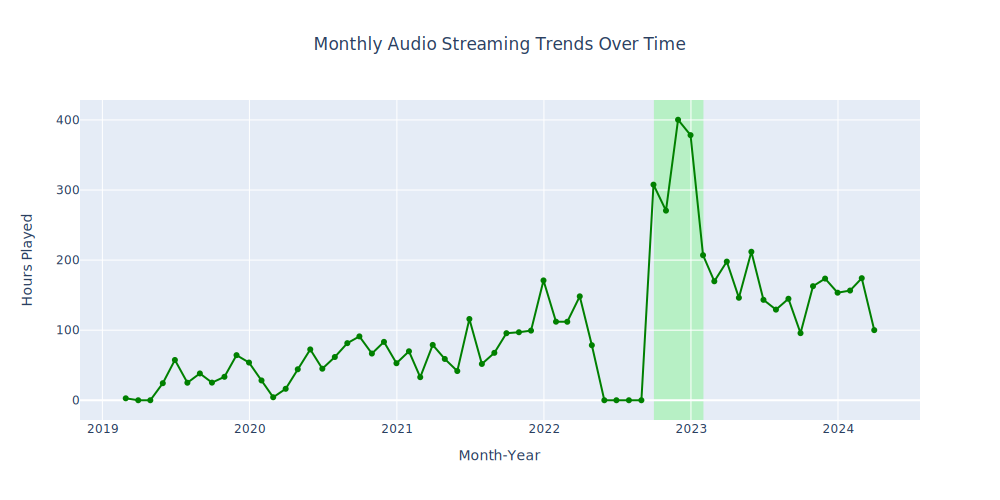

In [201]:
# Set 'ts' column as the index
indexed = spotify_data.set_index('ts', inplace=False)

# Resample the data on a monthly basis
streaming_trends = indexed.resample('M').sum()

fig = px.line(streaming_trends, x=streaming_trends.index, y=(streaming_trends['ms_played'] / (1000 * 60 * 60)).round(2),
              labels={'ts': 'Month-Year', 'y': 'Hours Played'},
              title='Monthly Audio Streaming Trends Over Time',
              color_discrete_sequence=['green'], markers=True)

fig.add_vrect(x0="2022-10-01", x1="2023-02-01", 
              fillcolor="rgba(0,255,0,0.2)", 
              layer="below", 
              line_width=0)

fig.update_layout(title=dict(text='Monthly Audio Streaming Trends Over Time', x=0.5),
                  xaxis_title='Month-Year',
                  yaxis_title='Hours Played',
                  width=1000, height=500)
fig.show()

#### **Weekly `audio` streaming trend**

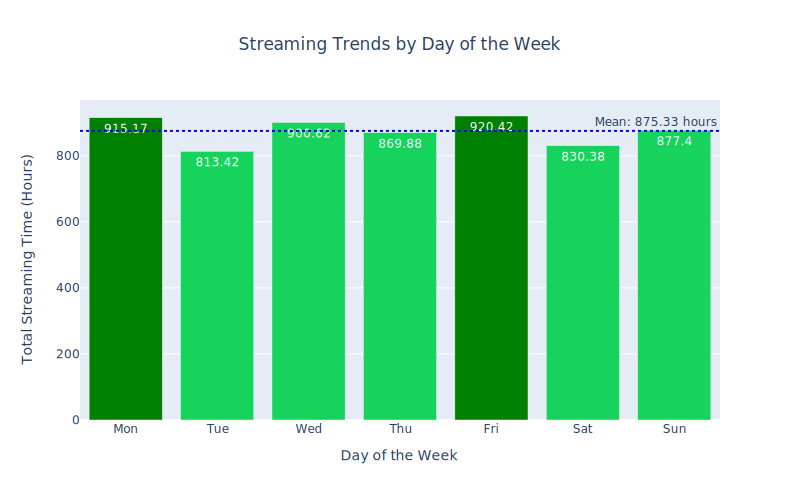

In [202]:
# Analyze trends based on the day of the week
trends_by_day = spotify_data.groupby(spotify_data['ts'].dt.dayofweek).agg({
    'ms_played': lambda x: x.sum() / (1000 * 60 * 60)
    }).reset_index()

# Get the top 2 days of the week
top_days = trends_by_day.nlargest(2, 'ms_played').index

fig = px.bar(trends_by_day, x='ts', y='ms_played',
             labels={'ms_played': 'Total Streaming Time (Hours)', 'ts': 'Day of the Week'},
             title='Streaming Trends by Day of the Week')

mean_trends_by_day = trends_by_day['ms_played'].mean()
fig.add_hline(y=mean_trends_by_day, 
              line_dash="dot", line_color="blue", 
              annotation_text=f'Mean: {mean_trends_by_day:.2f} hours',
              annotation_position="top right")

colors = ['green' if i in top_days else '#16D35C' for i in trends_by_day.index]
fig.update_traces(marker_color=colors,
                  text=trends_by_day['ms_played'].round(2), 
                  textposition='inside', 
                  textfont=dict(color='white'))

fig.update_layout(xaxis=dict(tickmode='array', tickvals=list(range(7)), ticktext=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']),
                  title=dict(text='Streaming Trends by Day of the Week', x=0.5),
                  width=800, height=500)
fig.show()

#### **`Platform` Analysis**

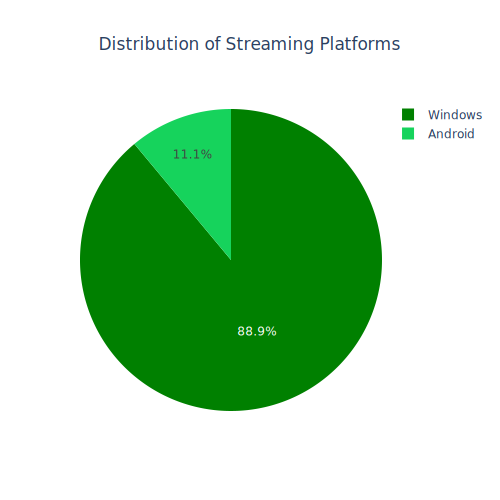

In [203]:
# Calculate platform counts
platform_counts = spotify_data['platform'].value_counts()

fig = px.pie(platform_counts, values=platform_counts.values, names=platform_counts.index,
             title='Distribution of Streaming Platforms')

# Customize the appearance
fig.update_traces(marker=dict(colors=['green', '#16D35C']))  # Set custom colors
fig.update_layout(title={'text': 'Distribution of Streaming Platforms', 'x': 0.5})  # Center the title
fig.update_layout(width=500, height=500)

fig.show()

### **`Music` Streaming Analysis**

#### **Yearly `Music` Streaming Trend**

##### **By Play Counts**

##### **By Playback Duration**

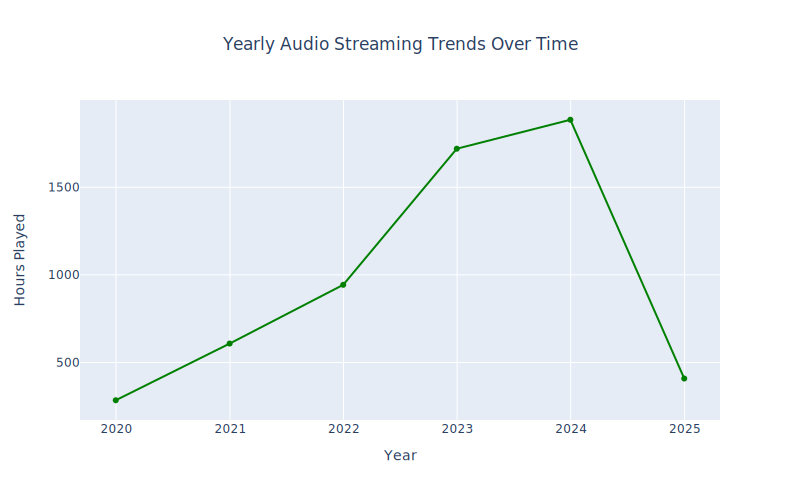

In [204]:
# Set 'ts' column as the index
indexed = spotify_music.set_index('ts', inplace=False)

streaming_trends_yearly = indexed.resample('Y').sum()

fig = px.line(streaming_trends_yearly, 
              x=streaming_trends_yearly.index, 
              y=(streaming_trends_yearly['ms_played'] / (1000 * 60 * 60)).round(2),
              labels={'ts': 'Year', 'y': 'Hours Played'},
              title='Yearly Audio Streaming Trends Over Time',
              color_discrete_sequence=['green'], markers=True)

fig.update_layout(title=dict(text='Yearly Audio Streaming Trends Over Time', x=0.5),
                  xaxis_title='Year',
                  yaxis_title='Hours Played',
                  width=800, height=500)
fig.show()

##### **By Song Counts**

In [205]:
spotify_music['year'] = spotify_music['ts'].dt.year
grouped_data = spotify_music.groupby('year').size().reset_index(name='song_count')
grouped_data = grouped_data.sort_values(by='year')

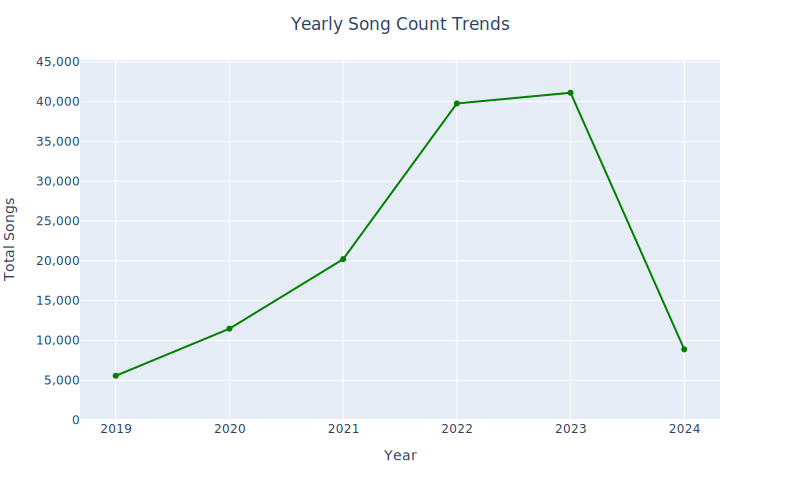

In [206]:
fig = px.line(grouped_data, x='year', y='song_count',
              labels={'year': 'Year', 'song_count': 'Total Songs'},
              color_discrete_sequence=['green'],
              markers=True)

fig.update_layout(title=dict(text='Yearly Song Count Trends', x=0.5),
                  xaxis_title='Year',
                  yaxis_title='Total Songs',
                  width=800, height=500,
                  yaxis=dict(tickformat=',.0f', range=[0, grouped_data['song_count'].max() * 1.1]))
fig.show()

##### **By Artists Counts**

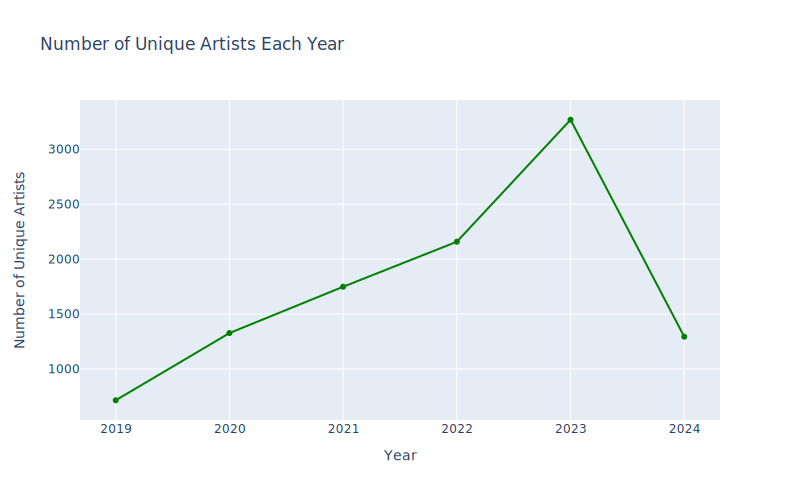

In [207]:
# Create a 'year' column based on the 'ts' timestamp column
spotify_data['year'] = spotify_data['ts'].dt.year

# Calculate the number of unique artists for each year
artists_per_year = spotify_data.groupby('year')['master_metadata_album_artist_name'].nunique().reset_index()

# Create the plot using Plotly Express (px)
fig = px.line(artists_per_year, x='year', y='master_metadata_album_artist_name',
             labels={'year': 'Year', 'master_metadata_album_artist_name': 'Number of Unique Artists'},
             title='Number of Unique Artists Each Year',
             color_discrete_sequence=['green'], markers=True,
             width=800, height=500)
fig.show()

#### **Monthly `Music` Streaming Trend**

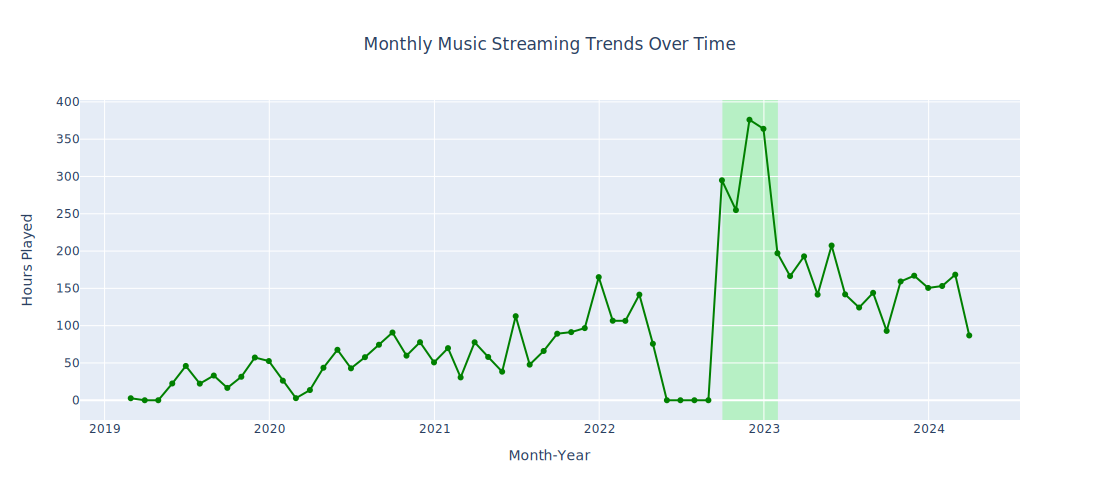

In [208]:
# Set 'ts' column as the index
indexed = spotify_music.set_index('ts', inplace=False)

# Resample the data on a monthly basis
streaming_trends = indexed.resample('M').sum()

# Create a line plot using Plotly Express
fig = px.line(streaming_trends, x=streaming_trends.index, y=(streaming_trends['ms_played'] / (1000 * 60 * 60)).round(2),
              labels={'ts': 'Month-Year', 'y': 'Hours Played'},
              title='Monthly Audio Streaming Trends Over Time',
              color_discrete_sequence=['green'], markers=True)

fig.add_vrect(x0="2022-10-01", x1="2023-02-01", fillcolor="rgba(0,255,0,0.2)", layer="below", line_width=0)

fig.update_layout(title=dict(text='Monthly Music Streaming Trends Over Time', x=0.5),
                  xaxis_title='Month-Year',
                  yaxis_title='Hours Played',
                  width=1100, height=500)
fig.show()

#### **Weekly `Music` Streaming Trend**

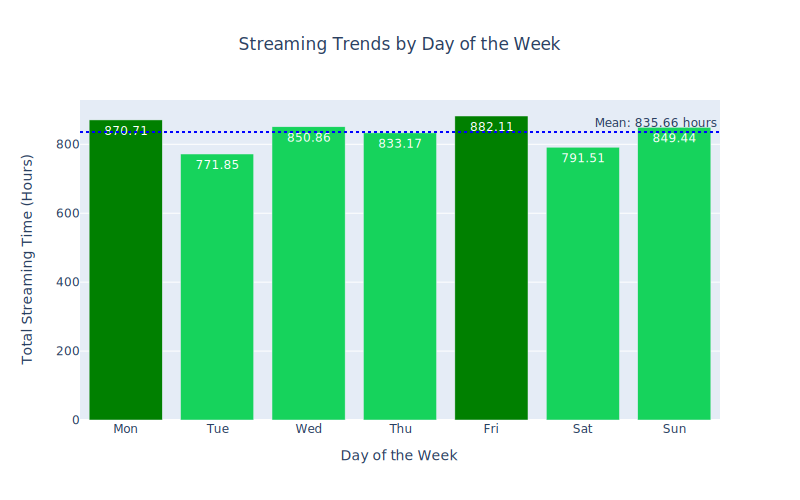

In [209]:
# Analyze trends based on the day of the week
trends_by_day = spotify_music.groupby(spotify_data['ts'].dt.dayofweek).agg({
    'ms_played': lambda x: x.sum() / (1000 * 60 * 60)  # Convert milliseconds to hours and sum
}).reset_index()

# Get the top 2 days of the week
top_days = trends_by_day.nlargest(2, 'ms_played').index

# Visualize the trends
fig = px.bar(trends_by_day, x='ts', y='ms_played',
             labels={'ms_played': 'Total Streaming Time (Hours)', 'ts': 'Day of the Week'},
             title='Streaming Trends by Day of the Week')

mean_trends_by_day = trends_by_day['ms_played'].mean()
fig.add_hline(y=mean_trends_by_day, 
              line_dash="dot", line_color="blue", 
              annotation_text=f'Mean: {mean_trends_by_day:.2f} hours',
              annotation_position="top right")

colors = ['green' if i in top_days else '#16D35C' for i in trends_by_day.index]
fig.update_traces(marker_color=colors,
                  text=trends_by_day['ms_played'].round(2), 
                  textposition='inside', 
                  textfont=dict(color='white'))

fig.update_layout(xaxis=dict(tickmode='array', tickvals=list(range(7)), ticktext=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']),
                  title=dict(text='Streaming Trends by Day of the Week', x=0.5),
                  width=800, height=500)
fig.show()

#### **Daily `Music` Streaming Trend**

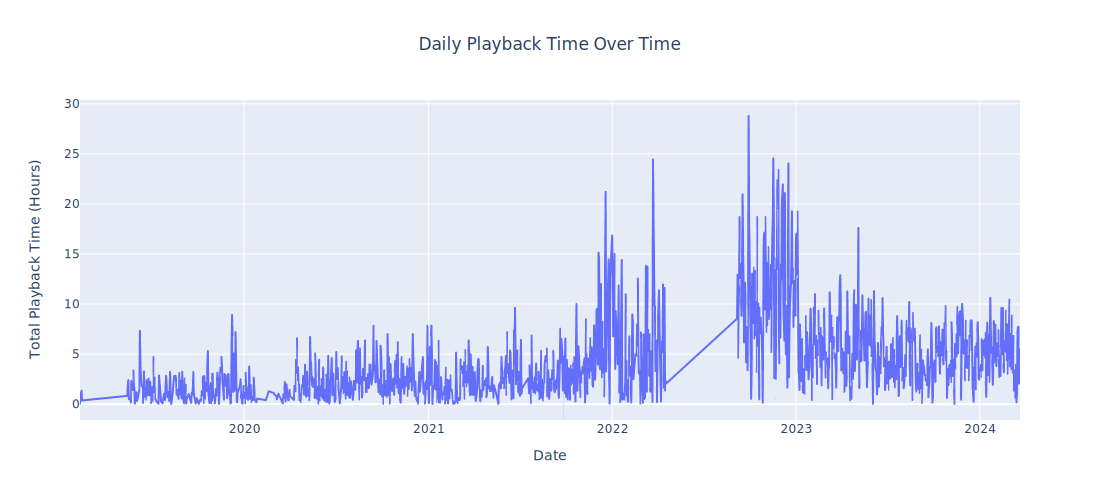

In [210]:
daily_playback_counts = (spotify_music.groupby(spotify_music['ts'].dt.date)['ms_played'].sum() / (1000 * 60 * 60)).reset_index()

fig = px.line(daily_playback_counts, x='ts', y='ms_played',
              labels={'ts': 'Date', 'ms_played': 'Playback Time'},
              title='Daily Playback Time Over Time',
              hover_data={'ts': '|%B %d, %Y'})

fig.update_layout(xaxis_title='Date', yaxis_title='Total Playback Time (Hours)', title_x=0.5,
                  width=1100, height=500)
fig.show()

In [211]:
may_5th_data = spotify_data[spotify_data['ts'].dt.date == pd.to_datetime('2023-05-05').date()]
song_playback_duration_may_5th = (may_5th_data.groupby(['master_metadata_album_artist_name', 'master_metadata_track_name'])['ms_played'].sum() / (1000 * 60)).reset_index()
top_10_songs_may_5th = song_playback_duration_may_5th.nlargest(10, 'ms_played')

top_10_songs_may_5th = top_10_songs_may_5th.rename(columns={'master_metadata_album_artist_name': 'Artist', 
                                                            'master_metadata_track_name': 'Track Name',
                                                            'ms_played': 'Playback Duration'})

top_10_songs_may_5th

,Artist,Track Name,Playback Duration
237,Taylor Swift,august,13.096100
269,d4vd,Here With Me,11.356467
173,New West,Those Eyes,11.037500
164,Miley Cyrus,Angels Like You,9.822650
249,The Weeknd,Die For You (with Ariana Grande) - Remix,8.293283
95,Justin Bieber,Love Yourself,7.790667
21,Aziz Hedra,Somebody's Pleasure,7.465233
102,Keane,Somewhere Only We Know,7.433967
188,Raim Laode,Komang,7.423533
230,Taylor Swift,All Of The Girls You Loved Before,7.380233


#### **Hourly `Music` Streaming Trend**

#### **`Top Albums` All the Time**

In [212]:
album_playback_duration = spotify_data.groupby('master_metadata_album_album_name')['ms_played'].sum() / (1000 * 60)
album_play_counts = spotify_data['master_metadata_album_album_name'].value_counts()

In [213]:
# Create a DataFrame with album names, artist names, and play times
album_metadata = spotify_data[['master_metadata_album_album_name', 'master_metadata_album_artist_name']]
album_metadata.drop_duplicates(inplace=True)  # Remove duplicate rows
album_metadata.set_index('master_metadata_album_album_name', inplace=True)

# Merge album_metadata with album_playback_duration
merged_data = album_metadata.merge(album_playback_duration, left_index=True, right_index=True)

# Merge merged_data with album_play_counts
merged_data = merged_data.merge(album_play_counts, left_index=True, right_index=True)

In [214]:
merged_data.columns = ['Artist Name', 'Playback Duration', 'Play Counts']

# Reset index to turn the index into a regular column
merged_data.reset_index(inplace=True)

# Set the desired name for the index column
merged_data.rename(columns={'master_metadata_album_album_name': 'Album Name'}, inplace=True)

In [215]:
grouped_data = merged_data.groupby('Album Name')

filtered_data = []

for album, group in grouped_data: # Check if the album has more than one artist
    if len(group['Artist Name'].unique()) > 1:
        filtered_data.append(group.head(1))
    else:
        filtered_data.append(group)

filtered_merged_data = pd.concat(filtered_data)

top_albums = filtered_merged_data.nlargest(20, 'Playback Duration')
print("\nTop 20 Albums by Playback Duration (in Hours) and Play Counts:\n", top_albums.to_string(index=False, float_format="{:.2f}".format))


Top 20 Albums by Playback Duration (in Hours) and Play Counts:
                              Album Name         Artist Name  Playback Duration  Play Counts
                               gg bb xx                LANY            3039.83         1084
                 Menari Dengan Bayangan              Hindia            2745.03          791
                          Malibu Nights                LANY            2528.48          811
                             mama's boy                LANY            2519.52          834
                              Midnights        Taylor Swift            2417.14          796
                          Mantra Mantra           Kunto Aji            2299.69          675
                                   LANY                LANY            2278.33          703
         The Feeling of Falling Upwards 5 Seconds of Summer            2251.92          593
                             logic mess         Arash Buana            1833.99          589
               

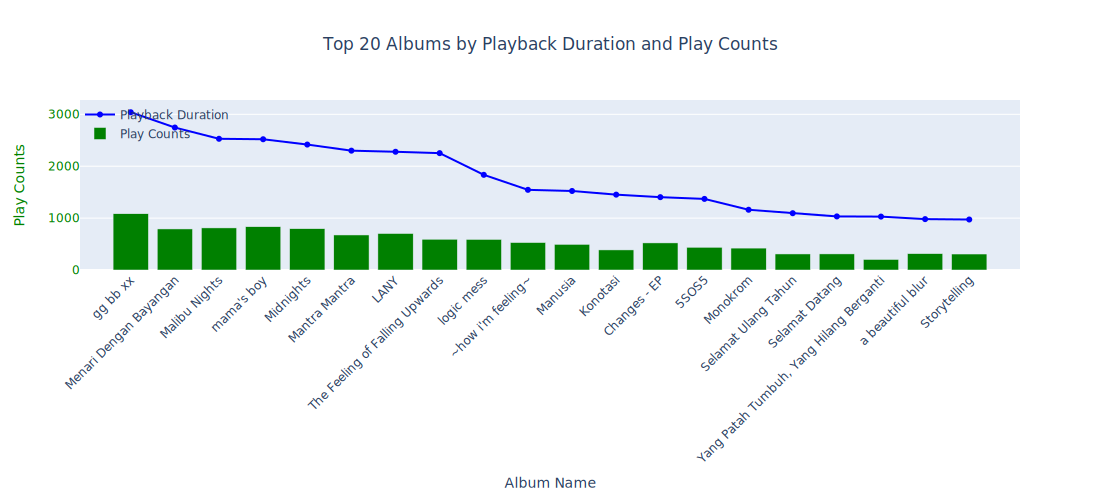

In [216]:
# Create traces for playback duration (line) and play counts (bars)
trace_duration = go.Scatter(x=top_albums['Album Name'], y=top_albums['Playback Duration'],
                            mode='lines+markers', name='Playback Duration', line=dict(color='blue'))
trace_counts = go.Bar(x=top_albums['Album Name'], y=top_albums['Play Counts'],
                      name='Play Counts', marker=dict(color='green'))

# Create layout for the chart with a secondary y-axis
layout = go.Layout(title='Top 20 Albums by Playback Duration and Play Counts', title_x=0.5,
                   xaxis=dict(title='Album Name', tickangle=-45),
                   yaxis=dict(title='Play Counts', side='left', color='green'),
                   yaxis2=dict(title='Playback Duration', side='right', overlaying='y', color='blue'),
                   legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'),
                   barmode='group', width=1100, height=500)

fig = go.Figure(data=[trace_duration, trace_counts], layout=layout)
fig.show()

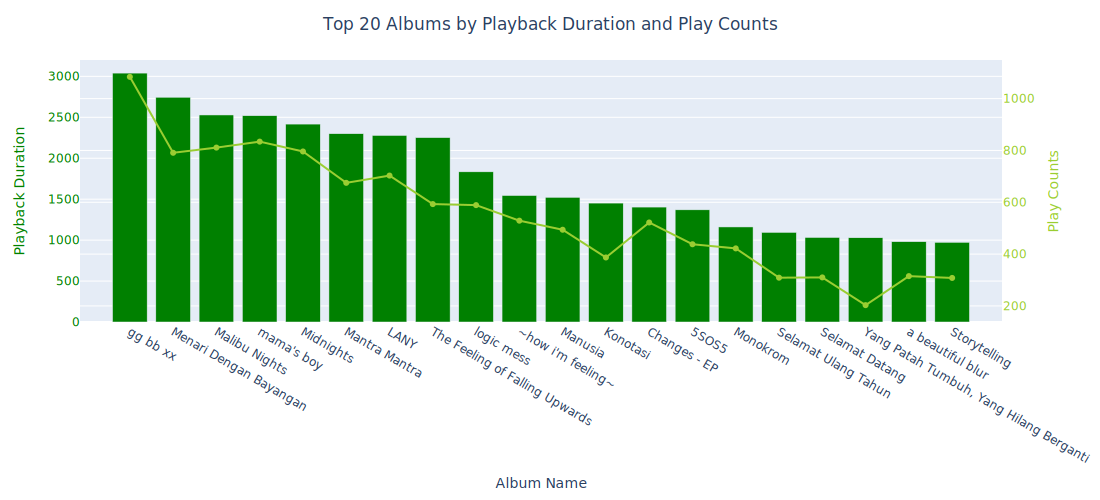

In [217]:
fig = px.bar(top_albums, x='Album Name', y='Playback Duration',
             color_discrete_sequence=['green'], labels={'Playback Duration': 'Playback Duration'})

fig.add_scatter(x=top_albums['Album Name'], y=top_albums['Play Counts'], 
                mode='lines+markers', name='Play Counts', yaxis='y2', line=dict(color='yellowgreen'))

fig.update_layout(title='Top 20 Albums by Playback Duration and Play Counts', title_x=0.5,
                  xaxis_title='Album Name', yaxis_title='Playback Duration',
                  yaxis=dict(title='Playback Duration', color='green'),
                  yaxis2=dict(title='Play Counts', color='yellowgreen', overlaying='y', side='right'),
                  showlegend=False, width=1100, height=500)

fig.update_traces(hovertemplate="<b>%{x}</b><br>Playback Duration: %{y:.2f}<extra></extra>", selector=dict(type='bar')) # Hover data for the bar plot
fig.update_traces(hovertemplate="<b>%{x}</b><br>Play Counts: %{y}<extra></extra>", selector=dict(type='scatter')) # Hover data for the line plot
fig.show()

#### **`Favourite Songs` All the Time**

#### **`Favourite Artists` All the Time**

In [218]:
# The top 20 artists with the most number of streams based on play counts
artist_play_counts = spotify_data['master_metadata_album_artist_name'].value_counts().head(20)
artist_play_counts

master_metadata_album_artist_name
LANY                   4546
Taylor Swift           2107
5 Seconds of Summer    2103
Tulus                  1422
Kunto Aji              1304
Lofi Fruits Music      1200
Lauv                   1097
Hindia                 1065
Hayd                   1048
Yiruma                 1046
Arash Buana            1035
YOASOBI                 982
Coldplay                935
keshi                   868
Khalid                  849
Justin Bieber           837
Sheila On 7             831
Ardhito Pramono         717
Jeremy Zucker           660
NIKI                    643
Name: count, dtype: int64

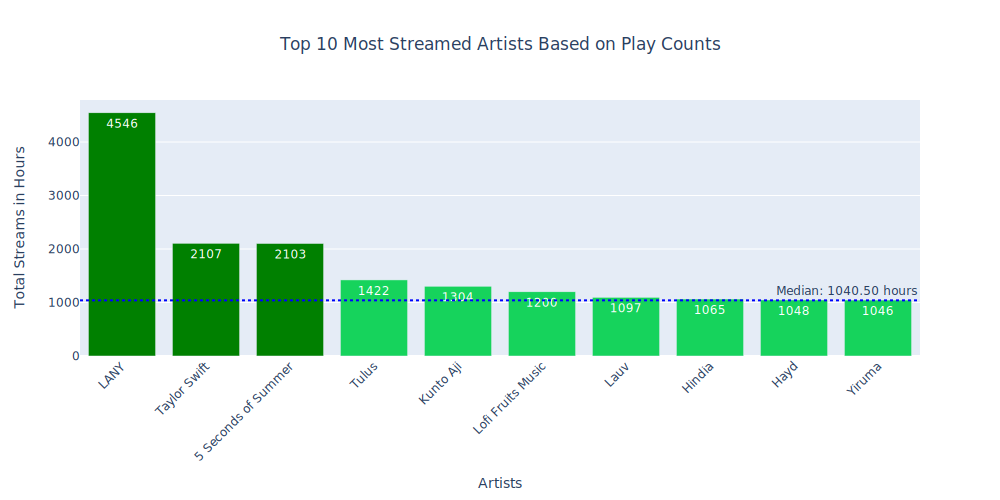

In [219]:
fig = px.bar(artist_play_counts.head(10), x=artist_play_counts.head(10).index, y=artist_play_counts.head(10).values,
             labels={'x': 'Artists', 'y': 'Total Streams'},
             title='Top 10 Most Streamed Artists Based on Play Counts')

# Define colors using Spotify palette for top 3 tracks, green for others
color_scale = ['green' if artist in artist_play_counts.head(3).index else '#16D35C' for artist in artist_play_counts.index]

fig.update_traces(marker_color=color_scale,
                  text=artist_play_counts.values, 
                  textposition='inside', 
                  textfont=dict(color='white'))

median_play_counts = artist_play_counts.median()
fig.add_hline(y=median_play_counts, 
              line_dash="dot", line_color="blue", 
              annotation_text=f'Median: {median_play_counts:.2f} hours',
              annotation_position="top right")

fig.update_layout(xaxis_title='Artists', 
                  yaxis_title='Total Streams in Hours', 
                  xaxis_tickangle=-45, showlegend=False, title_x=0.5,
                  width=1000, height=500)
fig.show()

In [220]:
# Calculate the accumulated number of streams for each artist in hours
artist_playback_duration = spotify_data.groupby('master_metadata_album_artist_name')['ms_played'].sum() / (1000 * 60 * 60)

# Sort artists based on the accumulated number of streams, from most to least
artist_playback_duration = artist_playback_duration.sort_values(ascending=False).head(20).reset_index()
artist_playback_duration

,master_metadata_album_artist_name,ms_played
0,LANY,230.744049
1,Taylor Swift,112.156477
2,5 Seconds of Summer,111.687614
3,Tulus,70.940952
4,Kunto Aji,68.328141
5,Hindia,62.088841
6,Yiruma,58.929776
7,Coldplay,56.972251
8,Arash Buana,54.303224
9,Hayd,50.801769


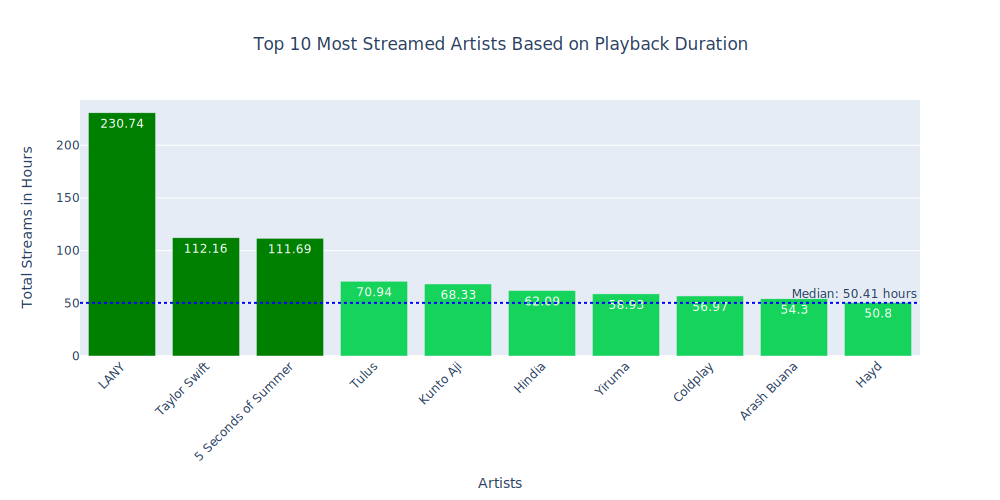

In [221]:
fig = px.bar(artist_playback_duration.head(10), x='master_metadata_album_artist_name', y='ms_played',
             labels={'master_metadata_album_artist_name': 'Artists', 'ms_played': 'Total Streams in Hours'},
             title='Top 10 Most Streamed Artists Based on Playback Duration')

# Define colors using Spotify palette for top 5 tracks, green for others
color_scale = ['green' if artist in artist_playback_duration.head(3).values else '#16D35C' for artist in artist_playback_duration['master_metadata_album_artist_name']]

fig.update_traces(marker_color=color_scale,
                  text=artist_playback_duration['ms_played'].round(2), 
                  textposition='inside', 
                  textfont=dict(color='white'))

median_playback_duration = artist_playback_duration['ms_played'].median()
fig.add_hline(y=median_playback_duration, 
              line_dash="dot", line_color="blue", 
              annotation_text=f'Median: {median_playback_duration:.2f} hours',
              annotation_position="top right")

fig.update_layout(xaxis_title='Artists', 
                  yaxis_title='Total Streams in Hours', 
                  xaxis_tickangle=-45, showlegend=False, title_x=0.5,
                  width=1000, height=500)
fig.show()

#### **`Top 3 Songs` from `Top 3 Artist`**

In [222]:
# Calculate the accumulated number of streams for each artist in hours
most_played_songs = (spotify_data.groupby(['master_metadata_album_artist_name', 'master_metadata_track_name'])['ms_played'].sum() / (1000 * 60)).reset_index()

# Sort artists based on the accumulated number of streams, from most to least
list_most_played_songs = most_played_songs.sort_values(by='ms_played', ascending=False).round(2).head(20)
list_most_played_songs

,master_metadata_album_artist_name,master_metadata_track_name,ms_played
2307,Cheon ji won,You Can Cry,935.66
7109,LANY,"the older you get, the less you cry",866.31
7048,LANY,Malibu Nights,864.07
4037,Feby Putri,Runtuh,730.33
6957,Kunto Aji,Rehat,725.18
5044,Hayd,Suffocate,722.41
7061,LANY,Thick And Thin,703.88
6952,Kunto Aji,Pilu Membiru,667.96
2357,Choi Yu Ree,Wish,665.10
14884,push baby,Wishing We Were More Than Friends,652.49


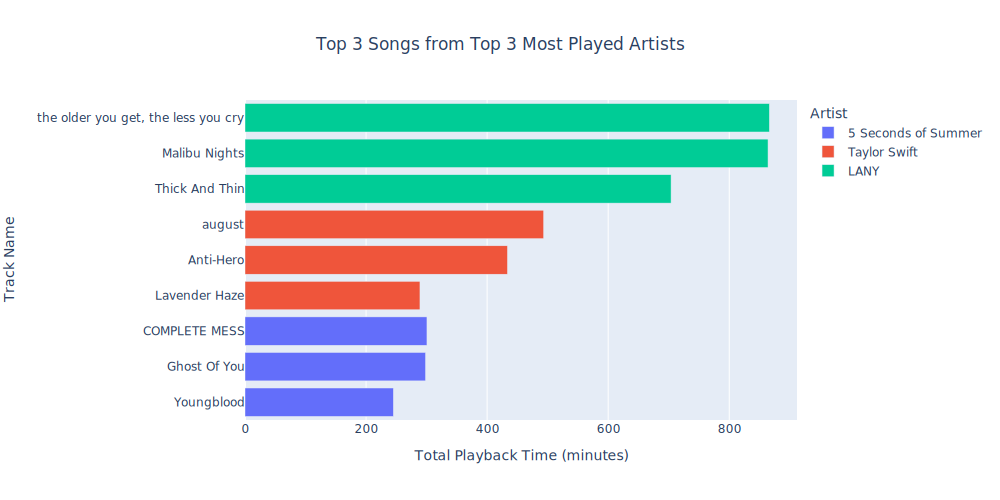

In [223]:
top_artists = artist_playback_duration.sort_values(by='ms_played', ascending=False).head(3)['master_metadata_album_artist_name']

top_songs = pd.concat([most_played_songs[most_played_songs['master_metadata_album_artist_name'] == artist].nlargest(3, 'ms_played') for artist in top_artists])
top_songs = top_songs.sort_values(by='ms_played', ascending=True)

fig = px.bar(top_songs, x='ms_played', y='master_metadata_track_name', color='master_metadata_album_artist_name', orientation='h',
             labels={'master_metadata_track_name': 'Track Name', 'ms_played': 'Playback Time', 'master_metadata_album_artist_name': 'Artist'},
             title='Top 3 Songs from Top 3 Most Played Artists')

fig.update_layout(xaxis_title='Total Playback Time (minutes)', yaxis_title='Track Name',
                  legend_title='Artist', title_x=0.5, width=1000, height=500)

fig.show()

#### **Yearly `Top Songs` and `Top Artists`**

##### **`2019` Top Songs and Top Artists**

In [224]:
spotify_data_2019 = spotify_data[spotify_data['ts'].dt.year == 2019]

top_songs = (spotify_data_2019.groupby(['master_metadata_track_name', 'master_metadata_album_artist_name'])['ms_played'].sum() / (1000 * 10)).reset_index()
top_songs = top_songs.sort_values(by='ms_played', ascending=False).head(20)

top_songs = top_songs.rename(columns={'master_metadata_album_artist_name': 'Artist', 
                                      'master_metadata_track_name': 'Track Name',
                                      'ms_played': 'Playback Duration'})

print("Top Songs for 2019:")
print(top_songs)

Top Songs for 2019:
                                          Track Name              Artist  Playback Duration
1301          Untuk Perempuan Yang Sedang Di Pelukan        Payung Teduh          1735.6242
1019    Sampai Jadi Debu (Menampilkan Gardika Gigih)         Banda Neira          1564.9837
546                            If You're Not The One  Daniel Bedingfield          1286.2758
732                                     Love Someone        Lukas Graham          1160.4668
1371         Yang Patah Tumbuh, Yang Hilang Berganti         Banda Neira          1116.8143
1197                              Teman Tapi Menikah       Dengarkan Dia          1001.2434
97                                             April       Fiersa Besari           994.5008
475                                      Hitam Putih           Fourtwnty           961.3434
517                                  I Love You 3000    Stephanie Poetri           926.2673
285                                           Dan...        

##### **`2020` Top Songs and Top Artists**

In [225]:
spotify_data_2020 = spotify_data[spotify_data['ts'].dt.year == 2020]

top_songs = (spotify_data_2020.groupby(['master_metadata_track_name', 'master_metadata_album_artist_name'])['ms_played'].sum() / (1000 * 10)).reset_index()
top_songs = top_songs.sort_values(by='ms_played', ascending=False).head(20)

top_songs = top_songs.rename(columns={'master_metadata_album_artist_name': 'Artist', 
                                      'master_metadata_track_name': 'Track Name',
                                      'ms_played': 'Playback Duration'})

print("Top Songs for 2020:")
print(top_songs)

Top Songs for 2020:
                   Track Name           Artist  Playback Duration
2070                Tiga Pagi           Fletch          2717.0763
748   Growing Up (Rara Sekar)         Daramuda          2056.1518
1656                 Sadajiwa           Fletch          1456.4656
1073           Laraku, Pilumu           Fletch          1445.7452
1260                 Membasuh           Hindia          1410.8291
1072                     Lara     Dialog Senja          1392.1713
699            Forget Jakarta   Adhitia Sofyan          1376.4033
124               Angin Hujan           Fletch          1268.4740
2322                    ghost       Skinnyfabs          1228.9302
1509             Pilu Membiru        Kunto Aji          1222.5940
19       3 A.M. (Bonus Track)           Fletch          1210.6356
1538           Pura Pura Lupa            Mahen          1125.9884
1503      Pesan Di Balik Awan   Adhitia Sofyan          1109.8110
175                  Bad Liar  Imagine Dragons          

##### **`2021` Top Songs and Top Artists**

In [226]:
spotify_data_2021 = spotify_data[spotify_data['ts'].dt.year == 2021]

top_songs = (spotify_data_2021.groupby(['master_metadata_track_name', 'master_metadata_album_artist_name'])['ms_played'].sum() / (1000 * 10)).reset_index()
top_songs = top_songs.sort_values(by='ms_played', ascending=False).head(20)

top_songs = top_songs.rename(columns={'master_metadata_album_artist_name': 'Artist', 
                                      'master_metadata_track_name': 'Track Name',
                                      'ms_played': 'Playback Duration'})

print("Top Songs for 2021:")
print(top_songs)

Top Songs for 2021:
                                             Track Name           Artist  Playback Duration
3016                                        You Can Cry     Cheon ji won          4105.4100
2087                                              Rehat        Kunto Aji          2200.9607
2064                                          Rainy Day      Sungha Jung          2063.9920
109                                          All I Need            JEMMA          1948.5355
1648                                             Middle         DJ Snake          1838.5583
2976                                               Wish      Choi Yu Ree          1817.4193
1600                                          May I Ask      Luke Chiang          1676.4227
2234                                            Sejenak        Biru Baru          1616.7461
1266                                          Je T'aime              JOY          1553.9198
229                                             Baangka     

##### **`2022` Top Songs and Top Artists**

In [227]:
spotify_data_2022 = spotify_data[spotify_data['ts'].dt.year == 2022]

top_songs = (spotify_data_2022.groupby(['master_metadata_track_name', 'master_metadata_album_artist_name'])['ms_played'].sum() / (1000 * 10)).reset_index()
top_songs = top_songs.sort_values(by='ms_played', ascending=False).head(20)

top_songs = top_songs.rename(columns={'master_metadata_album_artist_name': 'Artist', 
                                      'master_metadata_track_name': 'Track Name',
                                      'ms_played': 'Playback Duration'})

print("Top Songs for 2022:")
print(top_songs)

Top Songs for 2022:
                               Track Name         Artist  Playback Duration
4617  the older you get, the less you cry           LANY          3510.8196
3477                            Suffocate           Hayd          3390.6054
1558               Hugging You - Acoustic  Tom Rosenthal          2947.5772
3756                       Thick And Thin           LANY          2788.8270
4365                             get away           LANY          2690.4806
4603                         take a break    Arash Buana          2679.7142
4116    Wishing We Were More Than Friends      push baby          2394.4954
3513                            Super Far           LANY          2353.5310
1268                                Ghost  Justin Bieber          2334.5762
1085                             FEELINGS   Timmy Albert          2301.7431
4681                                 you!           LANY          2293.7744
4305                         cowboy in LA           LANY          22

##### **`2023` Top Songs and Top Artists**

In [228]:
spotify_data_2023 = spotify_data[spotify_data['ts'].dt.year == 2023]

top_songs = (spotify_data_2023.groupby(['master_metadata_track_name', 'master_metadata_album_artist_name'])['ms_played'].sum() / (1000 * 10)).reset_index()
top_songs = top_songs.sort_values(by='ms_played', ascending=False).head(20)

top_songs = top_songs.rename(columns={'master_metadata_album_artist_name': 'Artist', 
                                      'master_metadata_track_name': 'Track Name',
                                      'ms_played': 'Playback Duration'})

print("Top Songs for 2023:")
print(top_songs)

Top Songs for 2023:
                               Track Name                  Artist  Playback Duration
1248                       Cosmic Railway                     EXO          2904.3849
3781                        Malibu Nights                    LANY          2602.9827
5499                  Somebody's Pleasure              Aziz Hedra          2083.7113
1829                        Falling Again                    Ridh          2015.5834
3291                                LIMBO                   keshi          1944.5400
2438                         Here With Me                    d4vd          1925.6382
7318                            hurt road                    DAY6          1905.5338
4392                     Opening Sequence     TOMORROW X TOGETHER          1865.6154
5899                    Tak Segampang Itu            Anggi Marito          1807.4089
7064                               august            Taylor Swift          1786.7549
6239                           Those Eyes    

##### **`2024` Top Songs and Top Artists (Q1)**

In [229]:
spotify_data_2024 = spotify_data[spotify_data['ts'].dt.year == 2024]

top_songs = (spotify_data_2024.groupby(['master_metadata_track_name', 'master_metadata_album_artist_name'])['ms_played'].sum() / (1000 * 10)).reset_index()
top_songs = top_songs.sort_values(by='ms_played', ascending=False).head(20)

top_songs = top_songs.rename(columns={'master_metadata_album_artist_name': 'Artist', 
                                      'master_metadata_track_name': 'Track Name',
                                      'ms_played': 'Playback Duration'})

print("Top Songs for 2024:")
print(top_songs)

Top Songs for 2024:
                                             Track Name               Artist  Playback Duration
1648                                   Oceans & Engines                 NIKI          2971.3604
1703  Outer Space / Carry On (Live from The Royal Al...  5 Seconds of Summer          1379.0707
2615                                         Youngblood  5 Seconds of Summer          1348.8625
2226                                              Teeth  5 Seconds of Summer          1285.1589
174                                             Amnesia  5 Seconds of Summer          1255.8973
1335                                            Lighter             Galantis          1133.0853
256                                           Bad Omens  5 Seconds of Summer          1096.6947
2002                               She Looks So Perfect  5 Seconds of Summer          1071.8165
822                                        Ghost Of You  5 Seconds of Summer          1051.1631
1457   Me, Myself & 

### **`Podcast` Streaming Analysis**

#### **Yearly podcast streaming trend**

In [230]:
grouped_data = spotify_podcast.groupby(spotify_podcast['ts'].dt.year).size().reset_index(name='podcast_count')
grouped_data.columns = ['year', 'podcast_count']
grouped_data = grouped_data.sort_values(by='year')

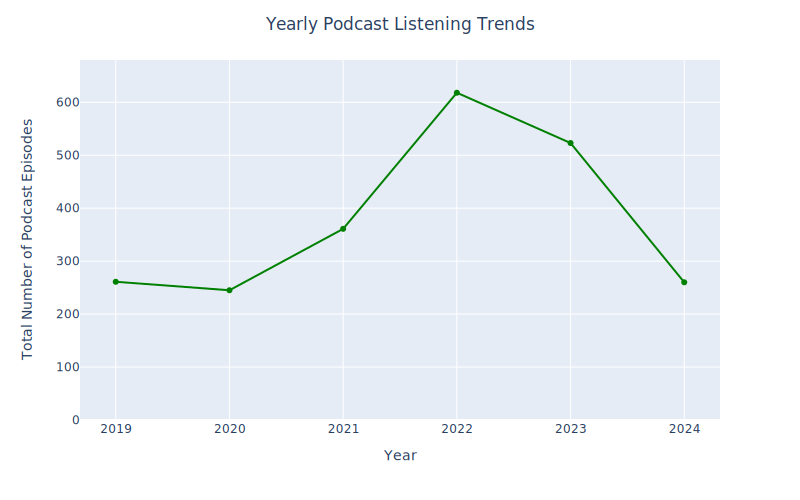

In [231]:
fig = px.line(grouped_data, x='year', y='podcast_count',
              labels={'year': 'Year', 'podcast_count': 'Total Episode'},
              color_discrete_sequence=['green'],
              markers=True)

fig.update_layout(title=dict(text='Yearly Podcast Listening Trends', x=0.5),
                  xaxis_title='Year',
                  yaxis_title='Total Number of Podcast Episodes',
                  width=800, height=500,
                  yaxis=dict(tickformat=',.0f', range=[0, grouped_data['podcast_count'].max() * 1.1]))
fig.show()

#### **Monthly podcast streaming trend**

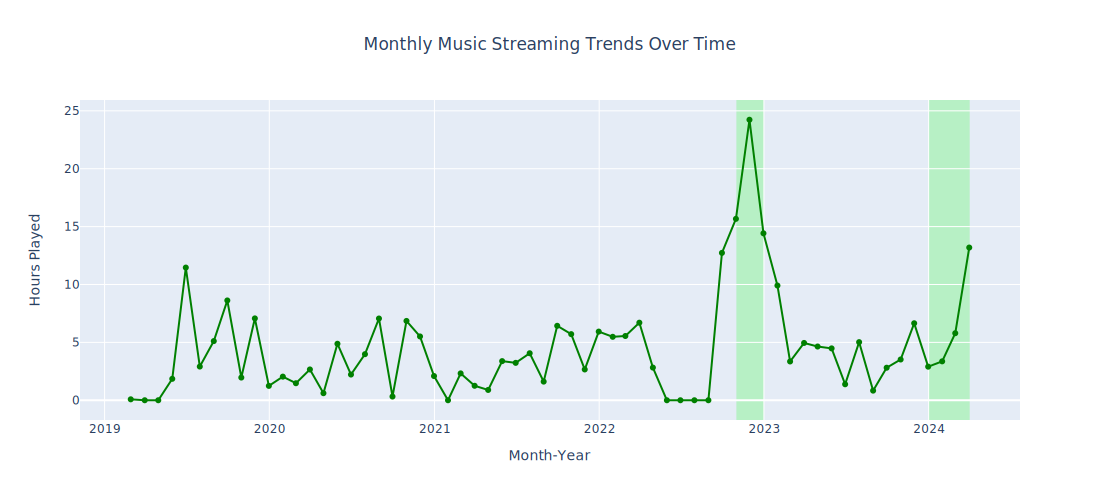

In [232]:
# Set 'ts' column as the index
indexed = spotify_podcast.set_index('ts', inplace=False)

# Resample the data on a monthly basis
streaming_trends = indexed.resample('M').sum()

# Create a line plot using Plotly Express
fig = px.line(streaming_trends, x=streaming_trends.index, y=(streaming_trends['ms_played'] / (1000 * 60 * 60)).round(2),
              labels={'ts': 'Month-Year', 'y': 'Hours Played'},
              title='Monthly Audio Streaming Trends Over Time',
              color_discrete_sequence=['green'], markers=True)

fig.add_vrect(x0="2022-11-01", x1="2023-01-01", fillcolor="rgba(0,255,0,0.2)", layer="below", line_width=0)
fig.add_vrect(x0="2024-01-01", x1="2024-04-01", fillcolor="rgba(0,255,0,0.2)", layer="below", line_width=0)

fig.update_layout(title=dict(text='Monthly Music Streaming Trends Over Time', x=0.5),
                  xaxis_title='Month-Year',
                  yaxis_title='Hours Played',
                  width=1100, height=500)
fig.show()

#### **Weekly podcast streaming trend**

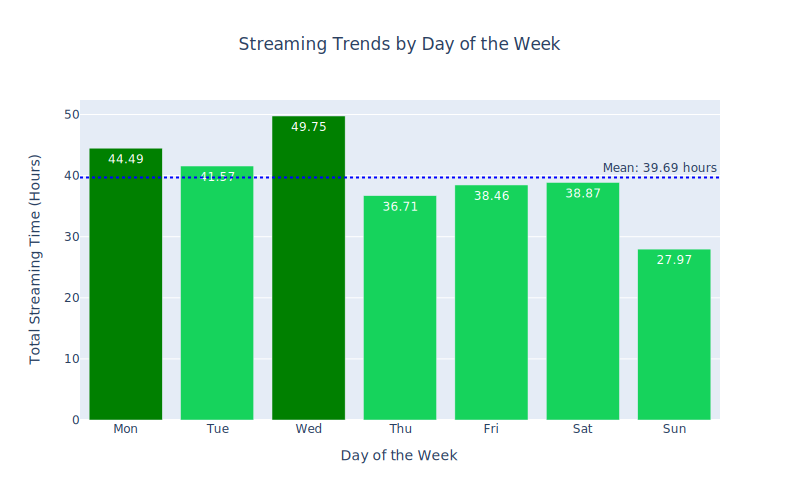

In [233]:
# Analyze trends based on the day of the week
trends_by_day = spotify_podcast.groupby(spotify_podcast['ts'].dt.dayofweek).agg({
    'ms_played': lambda x: x.sum() / (1000 * 60 * 60)  # Convert milliseconds to hours and sum
}).reset_index()

# Get the top 2 days of the week
top_days = trends_by_day.nlargest(2, 'ms_played').index

# Visualize the trends
fig = px.bar(trends_by_day, x='ts', y='ms_played',
             labels={'ms_played': 'Total Streaming Time (Hours)', 'ts': 'Day of the Week'},
             title='Streaming Trends by Day of the Week')

# Add a line to show the mean   
mean_trends_by_day = trends_by_day['ms_played'].mean()
fig.add_hline(y=mean_trends_by_day, 
              line_dash="dot", line_color="blue", 
              annotation_text=f'Mean: {mean_trends_by_day:.2f} hours',
              annotation_position="top right")

colors = ['green' if i in top_days else '#16D35C' for i in trends_by_day.index]
fig.update_traces(marker_color=colors,
                  text=trends_by_day['ms_played'].round(2), 
                  textposition='inside', 
                  textfont=dict(color='white'))

fig.update_layout(xaxis=dict(tickmode='array', tickvals=list(range(7)), ticktext=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']),
                  title=dict(text='Streaming Trends by Day of the Week', x=0.5),
                  width=800, height=500)
fig.show()

#### **Favourite podcast/show name all the time**

In [234]:
# Calculate the accumulated number of streams for each artist in hours
showname_playback_duration = spotify_data.groupby('episode_show_name')['ms_played'].sum() / (1000 * 60 * 60)

# Sort artists based on the accumulated number of streams, from most to least
showname_playback_duration = showname_playback_duration.sort_values(ascending=False).head(20).reset_index()
showname_playback_duration

,episode_show_name,ms_played
0,Mishary Rashid Alafasy,27.971994
1,Rintik Sedu,19.422181
2,DataFramed,13.877386
3,PodQuest,9.767602
4,"Kuas, Kanvas dan Bulan Kesepian",7.600316
5,YOASOBI THE BOOK 2 Spotify Edition,7.392940
6,Zenius Learning,6.584304
7,The Friday Podcast,5.433518
8,Data Talks,5.317237
9,Calm it Down,5.160765


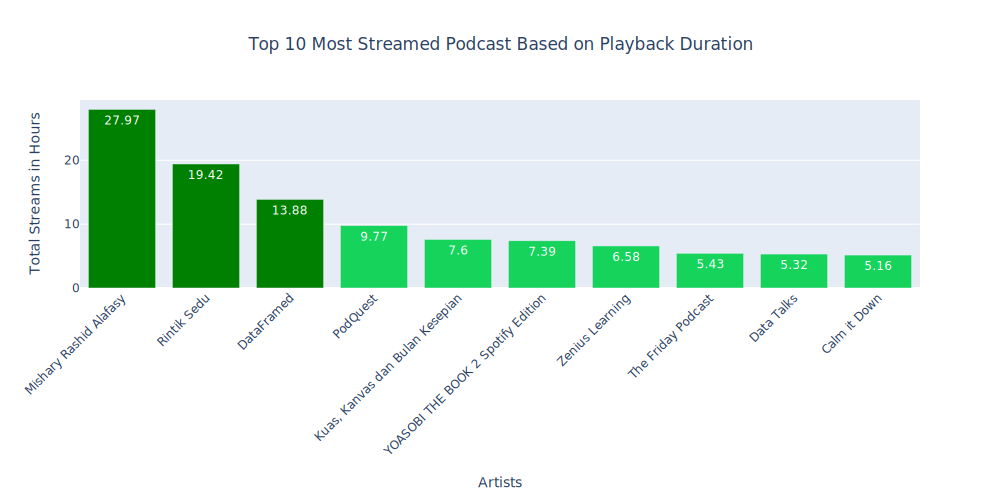

In [235]:
# Visualize top artists
fig = px.bar(showname_playback_duration.head(10), x='episode_show_name', y='ms_played',
             labels={'episode_show_name': 'Artists', 'ms_played': 'Total Streams in Hours'},
             title='Top 10 Most Streamed Podcast Based on Playback Duration')

# Define colors using Spotify palette for top 5 tracks, green for others
color_scale = ['green' if artist in showname_playback_duration.head(3).values else '#16D35C' for artist in showname_playback_duration['episode_show_name']]

# Update colors and text labels for each bar
fig.update_traces(marker_color=color_scale,
                  text=showname_playback_duration['ms_played'].round(2), 
                  textposition='inside', 
                  textfont=dict(color='white'))

fig.update_layout(xaxis_title='Artists', 
                  yaxis_title='Total Streams in Hours', 
                  xaxis_tickangle=-45, showlegend=False, title_x=0.5,
                  width=1000, height=500)
fig.show()

In [236]:
# The top 20 artists with the most number of streams based on play counts
showname_play_counts = spotify_podcast['episode_show_name'].value_counts().head(20)
showname_play_counts

episode_show_name
Mishary Rashid Alafasy                343
Rintik Sedu                           197
YOASOBI THE BOOK 2 Spotify Edition     86
Menjadi Manusia                        77
The Late Brunch with Sara Neyrhiza     51
Kuas, Kanvas dan Bulan Kesepian        47
quranreview                            45
Yaqeen Podcast                         39
PodQuest                               37
MengAnalisa                            34
Calm it Down                           33
Meditate with Tsamara                  30
Podcast Raditya Dika                   28
Zenius Learning                        28
WORK LIFE TRAMPOLINE                   27
Endgame with Gita Wirjawan             25
Mudacumasekali                         25
The Friday Podcast                     23
DataFramed                             23
BukaTalks                              23
Name: count, dtype: int64

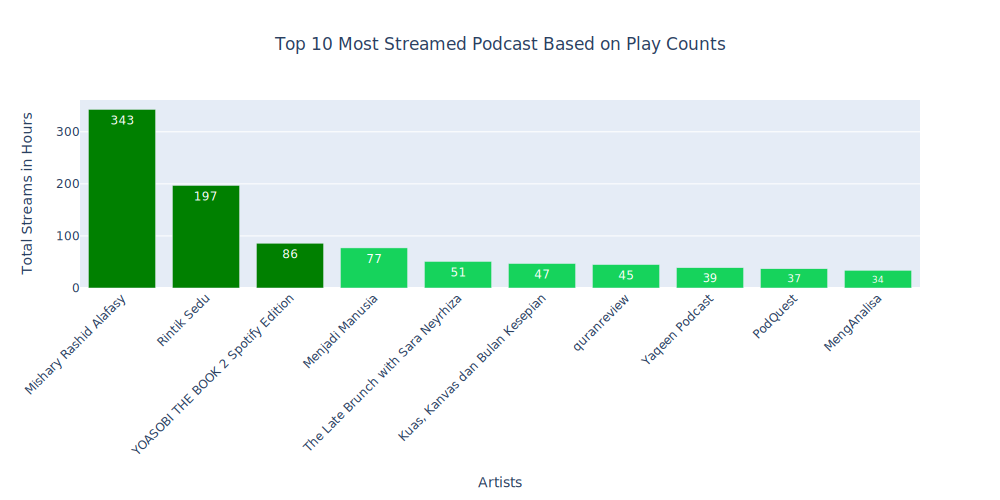

In [237]:
# Visualize top artists
fig = px.bar(showname_play_counts.head(10), x=showname_play_counts.head(10).index, y=showname_play_counts.head(10).values,
             labels={'x': 'Artists', 'y': 'Total Streams'},
             title='Top 10 Most Streamed Podcast Based on Play Counts')

# Define colors using Spotify palette for top 5 tracks, green for others
color_scale = ['green' if artist in showname_play_counts.head(3).index else '#16D35C' for artist in showname_play_counts.index]

# Update colors and text labels for each bar
fig.update_traces(marker_color=color_scale,
                  text=showname_play_counts.values, 
                  textposition='inside', 
                  textfont=dict(color='white'))

fig.update_layout(xaxis_title='Artists', 
                  yaxis_title='Total Streams in Hours', 
                  xaxis_tickangle=-45, showlegend=False, title_x=0.5,
                  width=1000, height=500)
fig.show()